# Unidad 3 – Clase 2: Procesamiento, análisis y visualización de datos/señales


![](../imagenes/workshop_logo_300x200.png)

## Índice
* [Matplotlib: implementación de gráficos de datos](#Matplotlib:-implementación-de-gráficos-de-datos)
    * [Primeros graficos](#Primeros-graficos)
    * [Formateo](#Formateo)
    * [Manejo de figuras](#Manejo-de-figuras)
    * [Agrupamiento y tipos de grafico](#Agrupamiento-y-tipos-de-gráfico)
    * [Acceso y modificacion de las propiedades](#Acceso-y-modificacion-de-las-propiedades)
    * [Contornos de igual nivel](#Contornos-de-igual-nivel)
* [Scipy: librería para procesamiento de señales](#Scipy:-librería-para-procesamiento-de-señales)
    * [Importando modulos de Scipy](#Importando-modulos-de-Scipy)
    * [Leer y escribir archivos WAV desde Scipy](#Leer-y-escribir-archivos-WAV-desde-Scipy)
    * [Leer y escribir archivos WAV desde PySoundfile](#Leer-y-escribir-archivos-WAV-desde-PySoundfile)
* [Analizando el espectro con la transformada rapida de Fourier](#Analizando-el-espectro-con-la-transformada-rapida-de-Fourier)
    * [Una primera aproximacion](#Una-primera-aproximacion)
    * [Aplicando una ventana temporal](#Aplicando-una-ventana-temporal)
* [Respuestas al impulso y convolucion](#Respuestas-al-impulso-y-convolucion)
* [Referencias](#Referencias)
* [Licencia](#Licencia)

## Matplotlib: implementación de gráficos de datos

[Matplotlib](https://matplotlib.org/) es una biblioteca de Python destinada a la producción de gráficas de alta calidad. 

![](../imagenes/matplotlib_logo.png)

Puede ser utilizada en scripts, consolas interactivas y notebooks, particularmente Jupyter, como haremos en este curso.

Sin más preámbulo, ¡pongamos manos a la obra!

### Primeros graficos

Ya que estudiamos Ingeniería de Sonido, comenzaremos como no podía ser de otra manera, graficando señales de uso común. La forma estándar de utilizar `matplotlib`, o por lo menos la más didáctica, es a través del módulo `pyplot`.

In [1]:
import matplotlib.pyplot as plt

Con la siguiente línea "mágica" de comando, indicamos a Jupyter que muestre las gráficas junto con el código:

In [2]:
%matplotlib inline

Para más información sobre "comandos mágicos", ver [Built-in magic commands](https://ipython.org/ipython-doc/3/interactive/magics.html) en la documentación de IPython.

Si bien `inline` es el comportamiento por defecto, de todas formas, consideramos plausible aclararlo. Prosigamos.

Grafiquemos un escalón unitario. Una forma sencilla de hacerlo es como sigue.

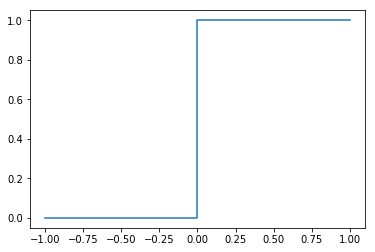

In [3]:
plt.plot( [-1, 0, 0, 1], [0, 0, 1, 1] )
plt.show()

La función `plot` toma dos vectores 'x' e 'y' de igual tamaño

\begin{align*}
    \mathbf{x} &= \begin{bmatrix} x_1 & x_2 & \cdots & x_N \end{bmatrix} \\
    \mathbf{y} &= \begin{bmatrix} y_1 & y_2 & \cdots & y_N \end{bmatrix}
\end{align*}

y    construye segmentos de recta en el plano cartesiano para unir  los puntos.

\begin{equation*}
    (x_1,y_1), (x_2,y_2), \dots (x_N,y_N)
\end{equation*}

Nótese que tales puntos coinciden con las columnas de la matriz resultante de apilar 'x' e 'y' como filas ( queda de $2 \times N$, o sea 2 filas y $N$ columnas).

En el caso del escalón unitario, lo que hicimos fue proveer los vectores

\begin{align*}
    \mathbf{x} &= \begin{bmatrix} -1 & 0 & 0 & 1 \end{bmatrix} \\
    \mathbf{y} &= \begin{bmatrix} \phantom{-}0 & 0 & 1 & 1 \end{bmatrix}
\end{align*}

de forma tal que `plot` construyó la poligonal a partir de los puntos


\begin{equation*}
    (-1,0),(0,0),(0,1),(1,1)
\end{equation*}

Una vez ejecutado `plot`, se instancia la clase `Line2D` de `matplotlib.lines` para utilizarla como contenedor de la poligonal, y se la guarda en un espacio de memoria. El comando `show`, invocado justo después de `plot`,  genera un dibujo con el objeto `Line2D` almacenado.

El comando `plot` puede utilizarse dando **y** como argumento único.


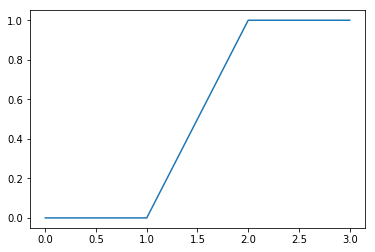

In [4]:
plt.plot([0, 0, 1, 1])
plt.show()

Los puntos que se unieron son:

\begin{equation*}
    (0,0), (1,0), (2,1), (3,1)
\end{equation*}

Observemos que los valores de abscisa, correspondientes a los valores de ordenada $\mathbf{y} = \begin{bmatrix} 0 & 0 & 1 & 1 \end{bmatrix}$ proporcionados al comando, quedaron $\mathbf{x} = \begin{bmatrix} 0 & 1 & 2 & 3 \end{bmatrix}$. 

En general, si ejecutamos `plot(y)` con $\mathbf{y} = \begin{bmatrix} y_1 & y_2 & \cdots & y_N \end{bmatrix}$ un vector cualquiera, `pyplot` construirá un $\mathbf{x} = \begin{bmatrix} 0 & 1 & \cdots & N-1 \end{bmatrix}$ automáticamente para representarlo en el plano.

"Elevemos la apuesta" y tratemos de graficar una función trigonométrica (vieja conocida). No tiene sentido tratar de realizar el proceso definiendo los vectores 'x' e 'y', como hicimos recién. Utilizaremos `numpy` para generar vectores dinámicamente, ahorrándonos trabajo.

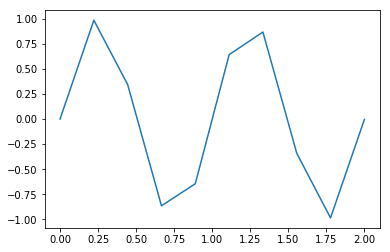

In [5]:
import numpy as np

x = np.linspace(0, 2, 10, dtype = np.float16)
y = np.sin(2 * np.pi * x) 

plt.plot(x, y)
plt.show()

El resultado es espantoso. Esto se debe a que  tenemos sólo 10&nbsp;muestras del eje *x*.

El comando `linspace` toma un determinado intervalo de números reales, en este caso el $[0, 2] \in \mathbb{R}$, y lo divide de forma equiespaciada en  10 elementos. En otras palabras, produce una partición regular 

\begin{equation*}
    \mathcal{P}\left\{ [0,2], 10 \right\} = \left[ \tfrac{2i}{9} : i = 0,1,2,\dots 9 \right] = \begin{bmatrix} 0 & \frac{2}{9} & \frac{4}{9} & \cdots & 2 \end{bmatrix}
\end{equation*}

en general, dado un intervalo de tiempo cualquiera $[t_1,t_2]$ el comando `linspace(t1, t2, N)` generará la siguiente partición del intervalo 

\begin{equation*}
    \mathcal{P}\left\{ [t_1,t_2], N \right\} = \left[ t_1 + \left(t_2-t_1\right) \cdot \frac{i}{N-1} : i = 0,1,2,\dots N-1 \right] = \begin{bmatrix} t_1 & t_1 + \left(t_2-t_1\right) \cdot \frac{1}{N-1} & t_1 + \left(t_2-t_1\right) \cdot \frac{2}{N-1} & \cdots & t_2 \end{bmatrix}
\end{equation*}

O sea que mejoraremos la resolución en tiempo  aumentando *N* (y por lo tanto, mejorará el dibujo, pues la curva no es otra cosa que la gráfica de una función 'y' dependiendo de 'x'). Hecho destacable de la informática: la computadora no maneja el continuo y conecuentemente discretiza, es decir,  todo aquello percibido como "curva", no es más que un conjunto de aproximaciones poligonales.

En nuestro caso, la poligonal se parece aceptablemente a una curva sinsuoide a partir de $N=50$.

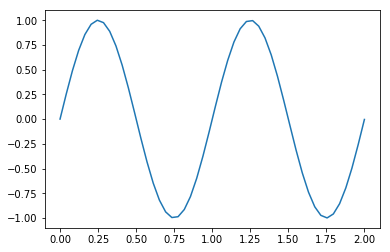

In [6]:
x = np.linspace(0, 2, 50, dtype = np.float16) 
y = np.sin(2 * np.pi * x) 

plt.plot(x, y)
plt.show()

¡Mucho mejor!

Para superponer otras gráficas encima de la que acabamos de hacer, basta ejecutar tantas veces como sea necesario el comando `plot` antes de `show`. Ejemplo:

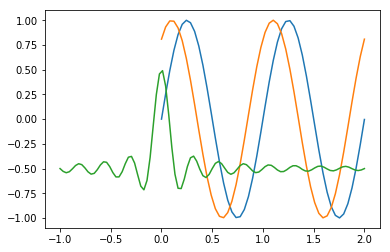

In [7]:
y2 = np.cos(2 * np.pi * (x - 0.1))

x3 = np.linspace(-1, 2, 99, dtype = np.float16) # tip: le dejamos 99 elementos para que el vector no contenga 0...
y3 = np.sin(8 * np.pi * x3) / (8 * np.pi * x3) - 0.5 # ... ¡así podemos dividir por x3!

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x3, y3)

plt.show()

> Otra forma de graficar varias curvas simultáneamente con `plot` es proporcionando tantos pares de vectores como curvas requiramos, es decir si **x1, y1** son los vectores que contienen los puntos de la primer poligonal, **x2, y2** los de la segunda, y siguiendo, **xN,yN** los de la *N*-ésima, entonces
>
> `plt.plot(x1, y1, x2, y2, ... xN, yN)`
>
> en el ejemplo aquí abordado, quedaría
>
> `plt.plot(x, y, x, y2, x3, y3)`
>
> ¡compruebe que da igual! Y no diga que no le avisamos.

### Formateo

Agregaremos algunas cosas, para que se vea todo más bonito:

* una grilla, con `grid(True)`;
* título al gráfico con `title`;
* nombres a los ejes `x` e `y` con `xlabel`, `ylabel` respectivamente.

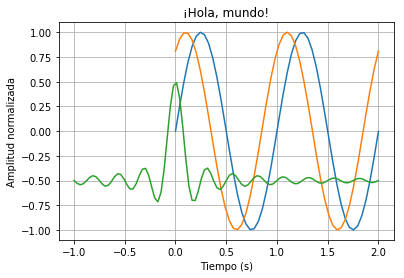

In [8]:
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x3, y3)

# "Embellecimiento"
plt.grid(True)
plt.title('¡Hola, mundo!')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud normalizada')

plt.show()

Ahora, demos nombres y estilo a cada una de las curvas. Construyamos también una leyenda para poder identificarlas. Los nombres pueden asignarse con el atributo `label` de cada `plot`, los estilos con atributos como `color`, `linewidth` y `linestyle`, mientras que la leyenda se muestra con el comando `legend`.

> **Nota:** El comando `plot` consta de innumerables opciones que no serán particularmente tratadas en este curso. Ante la duda, siempre podrá consultar la [documentación online de Matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) o bien, ejecutar `help(plt.plot)` en una consola.

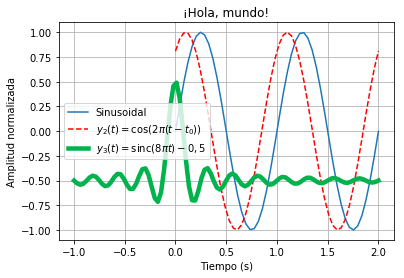

In [9]:
plt.plot(x, y, label='Sinusoidal') # Nombramos cada curva con el atributo label
plt.plot(
    x, y2,
    label='$ y_2(t) = \cos(2\pi(t-t_0))$ ', # podemos usar TeX escribiendo entre signos $
    color='r',     # asignamos el color rojo
    linestyle='--' # trazo de línea interrumpido
)
plt.plot(
    x3, y3,
    label='$ y_3(t) = \mathrm{sinc}(8\pi t) - 0,5$',
    color=(0, 0.7, 0.3), # podemos especificar el color mediante ternas (rojo, verde, azul)
    linewidth=4.5          # grosor igual a 4.5
)

plt.grid(True)
plt.title('¡Hola, mundo!')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud normalizada')

plt.legend() # esta sentencia muestra la lista de etiquetas cargadas anteriormente con label

plt.show()

La leyenda oculta parte del gráfico. Esto sucede porque no hay más espacio en el mismo. La solución es darle más espacio, para ubicar correctamente dicha leyenda.

Para esto emplearemos `ylim` especificando el intervalo de ordenadas que deseemos visualizar. En este caso, bastará con extender superiormente al intervalo, tomando p.&nbsp;ej. el $[-1,5; 2]$.

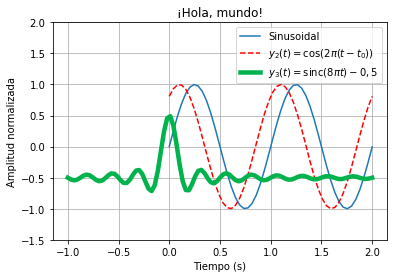

In [10]:
plt.plot(x, y, label='Sinusoidal')
plt.plot(x, y2, label='$ y_2(t) = \cos(2\pi(t-t_0))$ ', color='r', linestyle='--')
plt.plot(x3, y3, label='$ y_3(t) = \mathrm{sinc}(8\pi t) - 0,5 $', color=(0, 0.7, 0.3), linewidth=4.5)

plt.grid(True)
plt.title('¡Hola, mundo!')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud normalizada')

plt.ylim(-1.5, 2)

plt.legend()

plt.show()


Para elegir el rango de abscisa, se utiliza el comando `xlim`. Si queremos elegir  un rectángulo plano de visualización, basta ejecutar el comando `axis`. A este último se le otorga  un vector  de cuatro componentes $ \begin{bmatrix} x_{min} & x_{max} & y_{min} & y_{max} \end{bmatrix} $ conformado por los vértices de dicho rectángulo.

> Pruebe por ejemplo la siguiente sentencia
>
> `plt.axis([ -0.5, 0.5, 0, 1 ])`
>
> en lugar de `ylim`.

También podemos incluir anotaciones dentro del gráfico.

1. Señalemos uno de los lóbulos laterales del [sinc](https://es.wikipedia.org/wiki/Funci%C3%B3n_sinc) en el gráfico, para ello usaremos `annotate`.
2. Dejemos un mensaje para la posteridad en la esquina inferior izquierda mediante `text`:

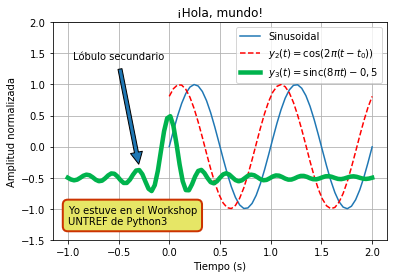

In [11]:
plt.plot(x, y, label='Sinusoidal')
plt.plot(x, y2, label='$ y_2(t) = \cos(2\pi(t-t_0))$ ', color='r', linestyle='--')
plt.plot(x3, y3, label='$ y_3(t) = \mathrm{sinc}(8\pi t) - 0,5 $', color=(0, 0.7, 0.3), linewidth=4.5)

plt.grid(True)
plt.title('¡Hola, mundo!')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud normalizada')


plt.annotate( # inserta flecha y texto en el gráfico
    'Lóbulo secundario', # texto
    xytext=(-0.5, 1.4),  # posición del texto en el gráfico
    horizontalalignment='center', # alineación horizontal
    arrowprops=dict(shrink=0.05), # propiedades de la flecha (shrink es un factor de escala)
    xy=(-0.29, -0.37) # punto señalizado del gráfico
)

plt.text(      # inserta sólo texto
    -1, -1.25, # coordenadas dentro del gráfico
    'Yo estuve en el Workshop\nUNTREF de Python3', # texto
    bbox = dict(
        facecolor = (0.9, 0.9, 0.4), # color de relleno de la caja dado como terna (R, V, A)
        edgecolor = (0.8, 0.2, 0), # color de borde
        linewidth = 2, # grosor de línea
        boxstyle = 'round, pad=0.5' # estilo rectangular con esquinas redondeadas y con zona de relleno igual a 0.5
    )
) 

plt.ylim(-1.5, 2)

plt.legend()

plt.show()


### Manejo de figuras
Separemos las gráficas anteriores en figuras diferentes. El proceso es tan sencillo como llamar al comando `figure` por cada una que necesitemos.

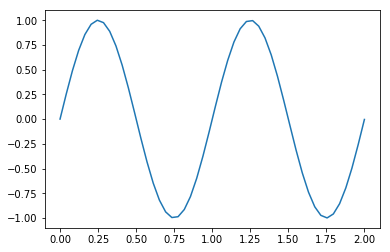

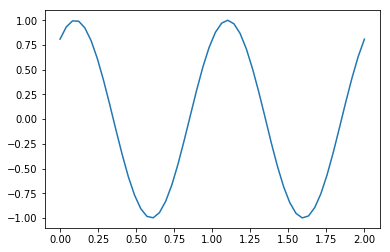

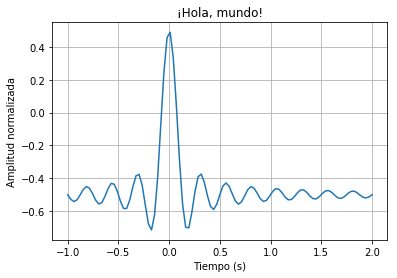

In [12]:
plt.figure()
plt.plot(x, y)

plt.figure()
plt.plot(x, y2)

plt.figure()
plt.plot(x3, y3)

plt.grid(True)
plt.title('¡Hola, mundo!')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud normalizada')

plt.show()

En Jupyter, todas las gráficas se ven como si estuviesen juntas, pero en realidad cada una está en su respectiva figura. Esto se pone de manifiesto al invocar los comandos de formateo: sólo aplican a los gráficos de la última figura creada.

> En una consola interactiva de Ipython, p.&nbsp;ej., cada llamada a `figure` generaría una ventana, siempre que el `backend` de `matplotlib` esté configurado con alguna interfaz gráfica. El `backend` es una biblioteca de interfaz gráfica que maneja el transfondo de la creación de figuras. Interesa particularmente a la hora de generar gráficas interactivas de `matplotlib` dentro de GUI. Si bien omitiremos la explicación en este curso, pues el desarrollo avanzado de GUI requeriría un curso por sí mismo, hay mucha información y ejemplos disponibles en la [documentación oficial de matplotlib](https://matplotlib.org/tutorials/introductory/usage.html#backends).

Si quisiéramos cambiar las propiedades de figuras específicas, primero deberíamos darles un nombre (lo más fácil es un valor numérico) e invocar `figure` con el identificador de la figura que precisemos modificar.

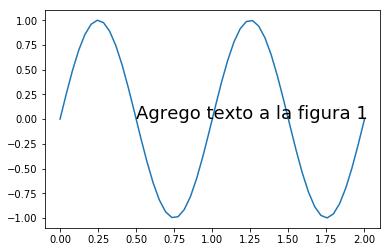

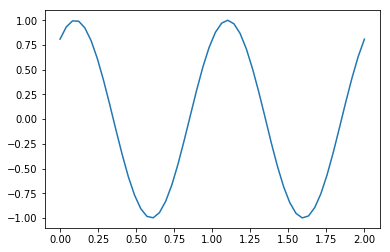

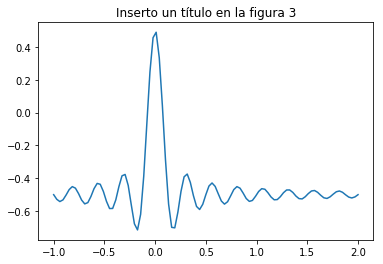

In [13]:
plt.figure(1)
plt.plot(x, y)

plt.figure(2)
plt.plot(x, y2)

plt.figure(3)
plt.plot(x3, y3)

plt.title('Inserto un título en la figura 3')

plt.figure(1)
plt.text(0.5, 0, 'Agrego texto a la figura 1', size=18)

plt.show()

Las figuras pueden guardarse como archivos con el comando `savefig`. El siguiente ejemplo genera una imagen [PNG](https://es.wikipedia.org/wiki/Portable_Network_Graphics) del [sinc](https://es.wikipedia.org/wiki/Funci%C3%B3n_sinc) con 300 [dpi de resolución](https://es.wikipedia.org/wiki/Puntos_por_pulgada). Si ejecuta el código desde este notebook, la imagen PNG se creará junto al archivo `ipynb` correspondiente.

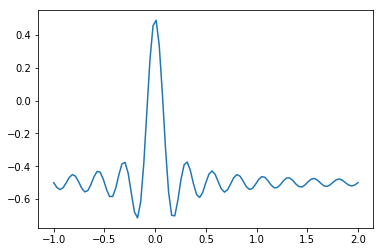

In [14]:
plt.plot(x3, y3)
plt.savefig('sinc.png', dpi=300)

### Agrupamiento y tipos de grafico

A veces necesitamos más de un gráfico dentro de una misma figura. Supongamos que vamos a representar los primeros 6&nbsp;s de la señal analógica $ x(t) = e^{- 0,3 \, t} \sin \left( 10 \, t  \right)$ y una versión muestreada de la misma, p.&nbsp;ej. $x[n] = x\left( n \, T_m \right)$ con $T_m = 0,25\,\text{s}$. Utilizaremos dos gráficos para contrastar la salida con la entrada, uno en tiempo "continuo" (en realidad, uno con la partición regular en `t` lo suficientemente fina) y uno en tiempo discreto. Para el primero, utilizaremos el comando `plot` de siempre, pero el segundo requerirá el comando `stem`. Además, necesitaremos reservar lugar para ambos gráficos en la figura. Ahí es donde entrará el comando `subplot`.

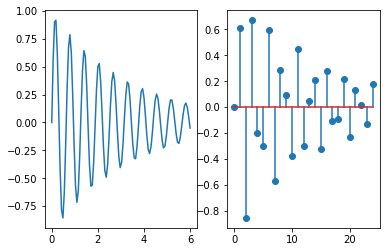

In [15]:
duracion, Tm = 6, 0.25 # datos
num  = 100 # número de elementos en la partición del intervalo continuo

N    = int(duracion / Tm) + 1 # longitud de x[n]
paso = int(num / (duracion / Tm + 1)) # cantidad de elementos a saltear para formar las muestras

t  = np.linspace(0, duracion, num, dtype = np.float16) # creamos el "intervalo continuo" de tiempo
xt = np.exp(-0.3 * t) * np.sin(10 * t)

xn = xt[::paso] # "Muestreamos", queda la señal discreta de N muestras

plt.subplot(121)
plt.plot(t, xt)

plt.subplot(122)
plt.stem(xn)

plt.show()

A diferencia de `plot`, el comando `stem` no traza poligonales entre los puntos dados. En cambio, una vez ubicados los puntos, se traza una línea horizontal en el cero, y se une cada uno de los puntos con dicha línea mediante segmentos verticales.

> Nótese que sólo hemos proporcionado a `stem` valores de ordenada, por ende, lo que se ve en abscisas es  la sucesión de números enteros entre $0$ y $N-1$ ($N\,=\,longitud\,de\,x[n]$).

Para reservar espacio en la figura, utilizamos `subplot(fcg)` donde `f` es la cantidad de filas, `c` la de columnas, y `g` la gráfica reservada. Esta sintaxis funciona solamente para una grilla de gráficas compuesta por menos de diez elementos en filas o columnas. De lo contrario, el comando debe utilizarse así: `subplot(f, c, g)`.

Hay otros tipos de gráfico, a continuación mostramos, dentro de una misma figura:
* semilogarítmico;
* polar;
* histograma;
* dispersión (XY)

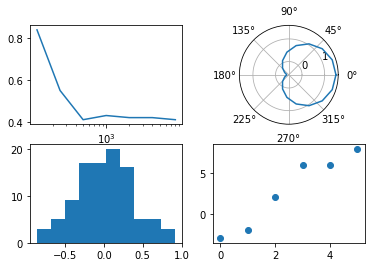

In [16]:
f = np.array([125, 250, 500, 1000, 2000, 4000, 8000], dtype = np.float16)
T = np.array([0.84, 0.55, 0.41, 0.43, 0.42, 0.42, 0.41], dtype = np.float16)

ang = np.linspace(0, 2 * np.pi, 20, dtype = np.float16)
rad = 0.5 + np.cos(ang)

np.random.seed(24)
dispersion_x = np.arange(6, dtype = np.int8)
dispersion_y = 2 * dispersion_x + np.random.randint(-5, 5, dispersion_x.size, dtype = np.int8)

plt.subplot(221)
plt.semilogx(f, T)

plt.subplot(222, polar=True)
plt.polar(ang, rad)

plt.subplot(223)
plt.hist(xt)

plt.subplot(224)
plt.scatter(dispersion_x, dispersion_y)

plt.show()

### Acceso y modificacion de las propiedades
Hay varias formas. La que usamos hasta el momento fue la declaración explícita de propiedades dentro de las funciones de `pyplot`, p.&nbsp;ej. 

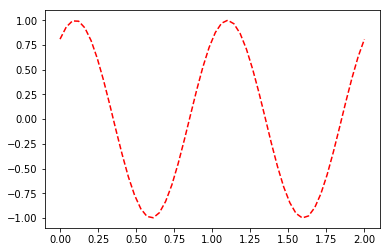

In [17]:
curva, = plt.plot(x, y2, label='$ y_2(t) = \cos(2\pi(t-t_0))$ ', color='r', linestyle='--')
plt.show()

indica al graficador que la curva generada por los vectores `x` e `y2` tiene asociadas tres propiedades:
1. Una etiqueta (`label`) con el texto de leyenda;
2. La cadena `'r'` asignada a la propiedad `color`, indicando que la curva debe mostrarse coloreada en *rojo*;
3. Un estilo de línea (`linestyle`) interrumpido.

Estas propiedades están asociadas a una instancia de la clase `Line2D` del módulo `matplotlib.lines`. Como hemos asignado la variable `curva` a la salida del comando `plot`,  podremos acceder a las propiedades del gráfico:

In [18]:
curva.get_label(), curva.get_color(), curva.get_linestyle()

('$ y_2(t) = \\cos(2\\pi(t-t_0))$ ', 'r', '--')

Vemos que las propiedades obtenidas coinciden con las asignadas anteriormente por el comando `plot`. 

Si graficamos más de una curva, `plot` devolverá una **lista** de objetos `Line2D`, a cuyos elementos podemos acceder, como siempre, mediante indizado.

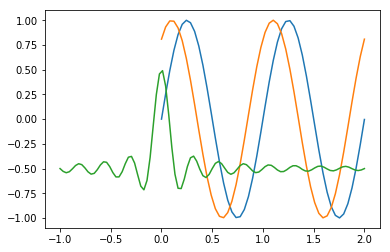

'#1f77b4'

In [19]:
lista_curvas = plt.plot(x, y, x, y2, x3, y3)
plt.show()

# Color del primer gráfico
lista_curvas[0].get_c()

In [20]:
# Algunas propiedades de la gráfica correspondiente al sinc
lista_curvas[2].get_c(), lista_curvas[2].get_linewidth(), lista_curvas[2].get_animated()

('#2ca02c', 1.5, False)

> **Nota:** la sentencia
>
> `curva, = plt.plot(x, y2, label='$ y_2(t) = \cos(2\pi(t-t_0))$ ', color='r', linestyle='--')`
>
> asigna solamente el **primer elemento de la lista** que devuelve `plot` a la variable `curva`. Implícitamente, lo que hacemos es utilizar la prestación de *desempaquetado*, ya incorporada en Python. Para más información, dirigirse a la [documentación correspondiente](https://docs.python.org/3/tutorial/controlflow.html#tut-unpacking-arguments). Hay también una explicación con ejemplos en un [artículo del blog de Abhinav](https://virtualenvblog.wordpress.com/2017/08/27/packing-and-unpacking-arguments-in-python/).

Para asignar valores a las propiedades de los gráficos, bien podemos:
1. Incluirlas como argumentos de la función `plot` (lo que venimos haciendo);
2. Instanciar los objetos `Line2D` que devuelve `plot` y llamar a la función `setp`;
3. Instanciar y utilizar los métodos `set` correspondientes.

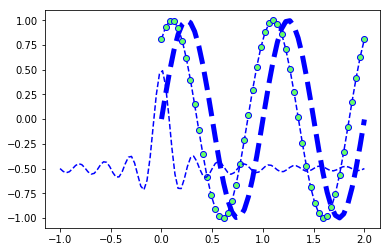

In [21]:
lista_curvas = plt.plot(x, y, x, y2, x3, y3)

plt.setp(lista_curvas, color='b', linestyle='--') # todas las líneas son azules e interrumpidas

lista_curvas[0].set_linewidth(5)   # la primera pasa a tener grosor 5
lista_curvas[1].set_marker('.')    # agregamos marcadores a la segunda curva
lista_curvas[1].set_markersize(12) # de tamaño 12
lista_curvas[1].set_markerfacecolor((0.4, 1, 0.4)) # rellenos con color verde clarito

plt.show()

La lista de propiedades que posee la clase `Line2D` está detallada en la [documentación de matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D).

### Contornos de igual nivel

En algunas ramas de la  Acústica y la Electroacústica suelen verse gráficos en color, que muestran contornos de igual nivel. Este nivel generalmente se trata de presión sonora, y los puntos del plano puede representar una ubicación física, o bien frecuencia y dirección, como en el caso de los diagramas de directividad.

Los contornos de igual nivel son representaciones de funciones de dos variables en el plano. A cada punto $(x,y)$ del plano se asigna un determinado color, relacionado con la imagen del punto $z=f(x,y)$. Matemáticamente, dada una función $z=f(x,y)$ definida sobre un conjunto $D_f \subseteq \mathbb{R}^2$, el "contorno de igual nivel *c*" es el conjunto

\begin{equation*}
    \operatorname{CN}(f,c)=\left\{ (x,y) \in D_f : f(x,y) = c \right\}
\end{equation*}

Evidentemente $\cup_{c \in \operatorname{Im}f} \operatorname{CN}(f,c) = D_f$, esto muestra que no tiene sentido graficar los contornos de nivel de una función `f` para **todos** los `c` posibles, en tal caso, sería lo mismo que graficar el dominio $D_f$ de la función `f`. 

Lo que **sí tiene sentido** hacer, es tomar ciertos valores de `c`, digamos `N` valores, y en ese caso tendríamos una colección **finita** de conjuntos, exactamente `N`, para graficar

\begin{equation*}
    \operatorname{CN}\left(f,c_1\right),\operatorname{CN}\left(f,c_2\right),\dots ,\operatorname{CN}\left(f,c_N\right)
\end{equation*}

en este caso la unión $\cup_{1 \le i \le N}\operatorname{CN}\left(f,c_i\right) \subset D_f$ quedaría un subconjunto del dominio, ya no sería todo el dominio (salvo casos raros, como el de la función $f(x,y)=\sqrt{x-y}+\sqrt{y-x}$ pero acá veremos cosas más normales que esa). La función `contourf` de `pyplot` construye contornos de nivel que, además, "rellena" con colores. 

Lo que haremos a continuación es graficar los contornos de igual nivel de una determinada función que depende de dos variables. El ejemplo pretende mostrar cómo se graficaría un diagrama de directividad para un rango de frecuencia $f$ y ángulo de incidencia  $\theta$ determinado, así que lo primero que haremos es generar la partición de un rectángulo en el plano $(f,\theta)$, específicamente el $[500,2000] \times [-100,100]$ en este ejemplo.

In [22]:
frec, direc = np.meshgrid(
    np.logspace(np.log10(500), np.log10(20e3), 50, dtype=np.float16),
    np.arange(-100, 110, 10, dtype=np.int8)
)

En esta instrucción están sucediendo muchas cosas. Primero, estamos particionando los intervalos [500,2000],&nbsp;[-100,100] para utilizar escalas logarítmica y lineal, respectivamente. Lo que pasamos al comando `logspace` son los logaritmos de los extremos del intervalo porque `logspace` aplica la exponencial,  para contrarrestar el hecho de que una escala logarítmica toma justamente, el logaritmo de la variable en cuestión para producir la gráfica. Además, estamos generando una partición regular del intervalo [-100,100]. El comando `arange` ya lo vimos.

Lo novedoso es  `meshgrid`, básicamente toma dos vectores `x` e `y`, de tamaños no necesariamente iguales,

\begin{align*}
    \mathbf{x} &= \begin{bmatrix} x_1 & x_2 & \cdots & x_N \end{bmatrix} \\
    \mathbf{y} &= \begin{bmatrix} y_1 & y_2 & \cdots & y_M \end{bmatrix}
\end{align*}

para construir el par de matrices  `X`, `Y` definidas a partir de sus componentes por

\begin{align*}
    X_{ij} &= x_{j} & \text{para } i &= 1, 2, \dots M \\
    Y_{ij} &= y_{i} & \text{para } j &= 1, 2, \dots N
\end{align*}

o sea que ambas matrices son de $M \times N$ y pueden realizarse operaciones componente a componente entre ellas. De esta forma, si necesitamos evaluar una función $z=f(x,y)$ en los puntos del plano

\begin{array}{ccccccccc}
    \left( x_1, y_1 \right) & \left( x_2, y_1 \right) & \cdots & \left( x_N, y_1 \right) & \rightarrow & f\left( x_1, y_1 \right) & f\left( x_2, y_1 \right) & \cdots & f\left( x_N, y_1 \right) \\
    \left( x_1, y_2 \right) & \left( x_2, y_2 \right) & \cdots & \left( x_N, y_2 \right) &  \rightarrow & f\left( x_1, y_2 \right) & f\left( x_2, y_2 \right) & \cdots & f\left( x_N, y_2 \right) \\
    \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots  \\
    \left( x_1, y_M \right) & \left( x_2, y_M \right) & \cdots & \left( x_N, y_M \right) & \rightarrow  & f\left( x_1, y_M \right) & f\left( x_2, y_M \right) & \cdots & f\left( x_N, y_M \right)
\end{array}

basta ver que $Z_{ij} = f\left( x_j,y_i \right) = f\left( X_{ij},Y_{ij} \right)$ ¡o sea que podemos emplear funciones de `numpy`, aplicadas componente a componente a cada matriz y sus combinaciones para generar la imagen de la función de dos variables! La matriz $\mathbf{Z}=f(\mathbf{X},\mathbf{Y})$ tendrá el mismo tamaño que `X` e `Y`, a saber, $M \times N$.

Veamos el siguiente ejemplo numérico para concretar las ideas:

In [23]:
X, Y = np.meshgrid(
    [ 0, 1, 2 ],
    [ 3, 4 ]
)

En este caso, 

\begin{align*}
    \mathbf{x} &= \begin{bmatrix}
        0 & 1 & 2 \\
    \end{bmatrix} & N &= 3 \\
    \mathbf{y} &= \begin{bmatrix}
        3 & 4 \\
    \end{bmatrix} & M &= 2   
\end{align*}

las matrices generadas quedan

In [24]:
X

array([[0, 1, 2],
       [0, 1, 2]])

In [25]:
Y

array([[3, 3, 3],
       [4, 4, 4]])

entonces podríamos, p.&nbsp;ej. evaluar los puntos

\begin{array}{ccc}
    \left( 0, 3 \right) & \left( 1, 3 \right) & \left( 2, 3 \right) \\
    \left( 0, 4 \right) & \left( 1, 4 \right) & \left( 2, 4 \right) \\
\end{array}

en la función $f(x,y) = x^2 + \cos \Big( \left(\pi/4\right) y \Big)$, los valores exactos son

\begin{array}{ccc}
    0-\frac{\sqrt{2}}{2} & 1 - \frac{\sqrt{2}}{2} & 2 - \frac{\sqrt{2}}{2}   \\
    -1 & 0 & 3 \\
\end{array}

Lo hacemos con `numpy` a partir de las matrices **X**,&nbsp;**Y** generadas por el `meshgrid`, de la siguiente forma:

In [26]:
X**2 + np.cos( (np.pi/4) * Y )

array([[-0.70710678,  0.29289322,  3.29289322],
       [-1.        ,  0.        ,  3.        ]])

Notar que el resultado es una aproximación numérica de los valores exactos escritos más arriba. 

Ahora que comprendemos un poco más el particionado del rectángulo en el plano, retomemos el ejemplo. Ya tenemos el mallado $(f,\theta)$, lo único que resta es evaluar la función de dos variables $L(f,\theta)$ para cada par $(f,\theta)$ de la partición, y pasar esta información a `contourf`. Esto nos dará los contornos coloreados de igual "nivel relativo", con  el ángulo $\theta = 0$ como referencia, en función de la frecuencia $f$ y el ángulo de incidencia $\theta$.

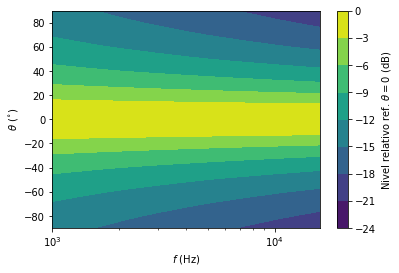

In [27]:
nivel_relativo = -3*(np.log10(frec)*np.log10(1+(direc/15)**2)) # construcción analítica burda

plt.contourf(frec, direc, nivel_relativo) # genera los contornos de igual nivel
plt.axis([1e3, 16e3, -90, 90]) # limita el rectángulo de visualización 
plt.xscale('log') # establece una escala de frecuencia logarítmica 
barra_colores = plt.colorbar() # muestra la escala de colores en una barra
barra_colores.set_label(r'Nivel relativo ref. $\theta = 0$ (dB)') # etiqueta dicha barra

plt.xlabel('$f$ (Hz)') # a partir de acá, es igual que siempre.
plt.ylabel(r'$\theta \ ({}^{\circ})$')

plt.show()

> **Nota**: la `r` antes de las literales, como p.&nbsp;ej. en `r'$\theta \ ({}^{\circ})$'` indica a Python que la cadena debe interpretarse como "cruda", o sea, sin tener en cuenta los caracteres especiales (tabulación&nbsp;`\t`, nueva línea&nbsp;`\n`, ... etc.). Esta es una de las cosas más elementales (para nutrirse con tips del estilo, ver la [Introducción informal a Python](https://docs.python.org/3/tutorial/introduction.html#strings)), pero no por eso menos importante, y vale la pena mencionarlo. 

> **Nota:** Si bien la creación de gráficas con el módulo  `pyplot` es fácil y rápida, en la documentación oficial de `matplotlib` se recomienda enfocar la programación al paradigma de orientación a objetos, por presentar la segunda forma más flexibilidad que la primera. La mayor parte de las funciones de `pyplot` están implementadas como métodos de la clase `Axes`, perteneciente al módulo `matplotlib.axes`.  Para profundizar,  dirigirse a la [documentación correspondiente.](https://matplotlib.org/2.2.2/api/axes_api.html#matplotlib.axes.Axes)

## Scipy: librería para procesamiento de señales

Scipy es una librería del paquete llamado con el mismo nombre. Está diseñada para trabajar en conjunto con Numpy, aplicando procesos sobre señales representadas por arrays.

Scipy está estructurada en forma de módulos, dentro de los cuales se encuentran distintas funciones específicas. Podemos ver la  lista completa de módulos en la [documentación online](https://docs.scipy.org/doc/scipy/reference/api.html) que nos ofrecen. O podemos desplazarnos en esta página y verla a continuación...

![](../imagenes/modulos_scipy.png)

Los módulos que vamos a tratar en este curso (y, en general, los que más nos interesan para procesamiento de señales de audio) son :

 * `scipy.io`: Contiene funciones para procesamiento de archivos en varios formatos. En particular vamos a explorar los submódulos *scipy.io.matlab* y *scipy.io.wavfile*.
 * `scipy.fftpack`: Contiene implementaciones de la transformada rápida de Fourier, y también de la transformada de Hilbert.
 * `scipy.signal`: Contiene implementaciones de técnicas destinadas al procesamiento de señales. Es el paquete que tiene toda la diversión, ya que podremos generar distintas formas de onda, diseñar filtros y aplicar convolución de señales.

### Importando modulos de Scipy

La librería Scipy se importa de a módulos, es decir que para importar correctamente, debemos ingresar `import scipy.modulo` reemplazando la última palabra por el nombre del módulo que vamos a utilizar. Podemos pensar que ingresando `import scipy` importaría todos los módulos, pero sólo se importan funciones pertenecientes al paquete Numpy.

### Leer y escribir archivos WAV desde Scipy 

El submódulo `wavfile` contiene las funciones  que permiten leer y escribir archivos de audio. En el primer caso, la información contenida en el archivo *.wav* es convertida en un array de Numpy. En el segundo, se construye un archivo *.wav* a partir de un array.

Para importar el módulo correspondiente, podemos proceder de la siguiente forma:

In [28]:
import scipy.io.wavfile as spwav
import numpy as np # también importamos numpy siempre que trabajemos con scipy

Para leer archivos de audio, utilizamos la función `read`, la cual nos devuelve la frecuencia de muestreo y los valores de las muestras de la señal en forma de array. Dentro de la carpeta de la clase se encuentra la carpeta audio, vamos a abrir el archivo 'clarinete.wav' (extraído del sitio [**OpenAirLib**](http://www.openairlib.net/)) contenido en la misma:

In [33]:
ruta = "../audio/"
fs, signal = spwav.read(ruta + "clarinete.wav")

ValueError: Unsupported bit depth: the wav file has 24-bit data.

¡Empezamos mal! Resulta que Scipy no puede leer archivos con datos de 24 bits. Ésta es justamente la única restricción que tendremos al importar archivos de audio. Lo que sucede es que los formatos numéricos de Numpy son de 8, 16, 32, 64 bits, y hasta 128 en algunos casos. Pero en ninguno representamos elementos con 24 bits y Scipy no contiene métodos para convertirlos en otros tipos de datos desde un archivo de audio.

### Leer y escribir archivos WAV desde PySoundfile

No es momento de entrar en pánico. Contamos con la librería [pysoundfile](https://pysoundfile.readthedocs.io/en/0.9.0/genindex.html) que es capaz de abrir archivos *.wav* de 24 bits. La señal se convierte en un array de formato *float64*, aunque también podemos especificar el formato de salida de los datos. Veamos cómo:

In [32]:
import soundfile as sf

signal_clar, sr = sf.read(ruta + "clarinete.wav", dtype=np.float32)

In [34]:
sr # frecuencia de muestreo

96000

In [35]:
signal_clar # array que contiene las muestras

array([-8.0227852e-05, -7.7366829e-05, -3.8146973e-06, ...,
        3.7598610e-04,  3.9291382e-04,  3.7658215e-04], dtype=float32)

In [36]:
signal_clar.dtype # tipo de datos del array

dtype('float32')

Para generar archivos de audio a partir de arrays, no tendremos el problema de los 24 bits (como dijimos, no existen tipos de datos de 24 bits en Numpy). De todas formas, si queremos tener nuestro archivo de audio codificado con 24 bits, podremos hacerlo con `pysoundfile` y su función `read`.

Preparemos primero un array representativo de una señal de audio. Tomemos el valor de la frecuencia de muestreo obtenido del archivo anterior para referenciarnos y construir un vector que represente los puntos en el tiempo durante 3 segundos. Luego podemos definir dos frecuencias y generar nuestro array a partir de la suma de dos senoidales. 

In [37]:
# generemos una señal
d = 3   # duración en segundos
sr_sint = 16000 # frecuencia de muestreo para sintetizar la señal
x = np.linspace(0, d, d*sr_sint, dtype=np.float32)   # tiempo
f1 = 440   # 440 Hz
f2 = 50    # 50 Hz
signal_sint = np.array(0.2*(np.sin(2*np.pi*f1*x) + 0.05 * np.cos(2*np.pi*f2*x)), dtype=np.float32)

Luego, crear el archivo de audio es tan fácil como indicar la ruta y nombre del mismo, la frecuencia de muestreo que deseamos asignar y el array a partir del cual se generará.

In [38]:
spwav.write(ruta + "audio_sintetizado.wav", sr_sint, signal_sint)

Y para el fundamentalista de los 24 bits...

In [39]:
sf.write(ruta + "audio_sintetizado_24b.wav", signal_sint, sr_sint, 'PCM_24')

Con esto tenemos cubiertos todos los posibles formatos `.wav` que necesitemos crear o importar. Podemos adoptar distintos criterios a la hora de utilizar librerías. A partir de lo visto, podemos ver que `pysoundfile` soporta cualquier formato, requiriendo los mismos argumentos de entrada que las funciones análogas de Scipy. Por otro lado, trabaja con arrays de Numpy, así que lo más fácil es utilizarla como una opción alternativa para no lidiar con la limitación de los 24 bits.

## Aplicación de FFT

## Analizando el espectro con la transformada rapida de Fourier

![](../imagenes/fast-fourier.png)

Para analizar el espectro de la señal es posible implementar el algoritmo conocido como **FFT (Fast Fourier Transform)**. El mismo aplica la Transformada Discreta de Fourier (DFT), optimizando la velocidad del cálculo (para ver mas información sobre la teoría relativa a la DFT hacer clic en el [siguiente enlace](https://ccrma.stanford.edu/workshops/cm2007/topics/clases/PDFs/05fourier_handout.pdf)). 
Gracias a ella es posible el análisis de espectro en tiempo real.
La misma realiza la siguiente transformación sobre una señal discreta (y aperiódica) representada por `x[0], x[1], x[2], ... , x[n]` muestras:

\begin{equation*}
    X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j \cdot 2\pi \cdot (\frac{kn}{N})} 
\end{equation*}

Cuyo dominio es $k \in [0,N-1]$, con N igual a la cantidad de muestras sobre la que aplicaremos transformación. Puede ser la señal completa, o un fragmento de la señal.

Su parte exponencial puede escribirse también como:

\begin{equation*}
    e^{-j \cdot 2\pi \cdot (\frac{kn}{N})} = \cos(2\pi\cdot \frac{kn}{N}) - j\sin(2\pi\cdot \frac{kn}{N})
\end{equation*}

Por otro lado, podemos aplicar la transformada inversa (IFFT) para obtener una señal en el dominio del tiempo a partir de su espectro:

\begin{equation*}
    x[n] = \frac{1}{N}\sum_{k=0}^{N-1} y[k] \cdot e^{j \cdot 2\pi \cdot (\frac{kn}{N})}
\end{equation*}

> **Nota**: Recordemos siempre la distinción entre DFT y FFT. La primera es la transformada de Fourier en sí, mientras que la FFT es sólo un método de calcularla acelerando el proceso de cálculo en sistemas computaciones.

### Una primera aproximacion

Para importar los módulos de Scipy necesarios para la implementación de estos algoritmos, procedemos de la siguiente manera:

In [40]:
# importamos los módulos para aplicar la FFT y su inversa 
from scipy.fftpack import fft as spfft
from scipy.fftpack import fft as spifft

Las funciones importadas aplican la transformada y su inversa respectivamente. Su implementación es tan simple como llamarla e indicar la señal a la que queremos modificar. En este caso, lo hacemos de la siguiente manera: `spfft(señal)`.

In [41]:
espectro_sint = spfft(signal_sint) # obtenemos el espectro de la señal sintetizada

espectro_sint[15], espectro_sint.dtype # valor del elemento [15] y formato del array

((0.008452408-0.004380417j), dtype('complex64'))

In [42]:
espectro_sint.size

48000

Analicemos un poco lo que obtuvimos, a partir de la expresión matemática de la FFT. Dijimos que $k \in [0,N-1]$, siendo N igual al número de muestras tomadas para realizar la transformada. En este caso, analizamos la señal completa, por lo que $N = frecuencia\ de\ muestreo [Hz]\cdot duracion[seg]$, lo que da 48000 muestras. Por otra parte, los valores de $X[k]$ son números complejos, es decir, que tienen una magnitud y una fase.

Los valores de k aún no representan valores de frecuencia. Quedan definidos en el rango $[0, 48000-1]$, por lo que hay que modificar este rango si queremos representar la señal correctamente.

Obviamente, nos conviene guardar el resultado en un array para poder analizarlo posteriormente. Por ejemplo, podemos trazar un gráfico del espectro. Podemos visualizar el valor absoluto, que representará la magnitud, para ver la distribución energética a lo largo del dominio de la frecuencia.

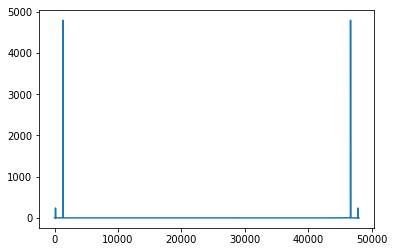

In [43]:
import matplotlib.pyplot as plt

plt.plot(np.abs(espectro_sint))
plt.show()

Este gráfico no nos muestra de forma clara la información que queremos ver. En principio se puede notar que aparecen dos puntos de mayor amplitud que, por conocer la señal previamente, podemos afirmar que representan la energía presente en las frecuencias de 50 Hz y 440 Hz. De todas formas, es difícil ubicarlos en el eje de la frecuencia; y además, aparecen espejados hacia la derecha del gráfico. Lo que sucede es que, por defecto, el espectro completo muestra las frecuencias positivas en la mitad izquierda del gráfico y de izquierda a derecha. Por otro lado, el espectro negativo se muestra espejado (como debe ser) pero de derecha a izquierda, del lado derecho del gráfico. Por último, todavía no vemos valores de frecuencia en el eje de abscisas. Lo que tenemos bien podría ser equivalente a la famosa función `cat`.

![](../imagenes/catgraph.png)

En Scipy podemos utilizar `fftshift` para reacomodar el array que representa el espectro de la señal de manera tal que muestre los valores de frecuencia en un continuo desde los más negativos hasta los positivos, con el cero en el centro. Esta vez veremos un espectro espejado, más acorde a lo que estamos acostumbrados a ver. De todas formas, todavía quedan cosas para hacer antes de tener un gráfico correcto.

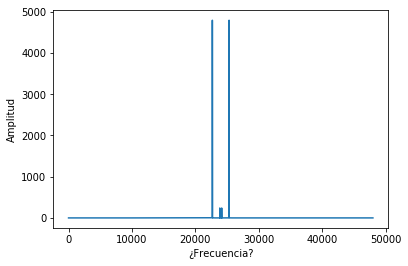

In [44]:
from scipy.fftpack import fftshift as spshift

plt.plot(np.abs(spshift(espectro_sint)))
plt.xlabel('¿Frecuencia?')
plt.ylabel('Amplitud')
plt.show()

Si bien ahora tenemos el cero en el centro del gráfico, los índices para el eje de frecuencia son incorrectos, comenzando desde cero para la frecuencia más negativa y con un rango de valores que no tiene que ver con el ancho de banda representado. Nos quedan por hacer dos cosas: 
 * Descartar la parte negativa del espectro y quedarnos con los valores positivos hasta la frecuencia de Nyquist
 * Redefinir el rango de las frecuencias positivas para que todas las muestras caigan dentro del ancho de banda.

A continuación, creamos un array `xfrec` para representar los valores de frecuencia a partir del cero, hasta la frecuencia de Nyquist, con N/2 cantidad de elementos. Con esto, tendremos nuestro eje de frecuencia correctamente definido entre los valores de interés.

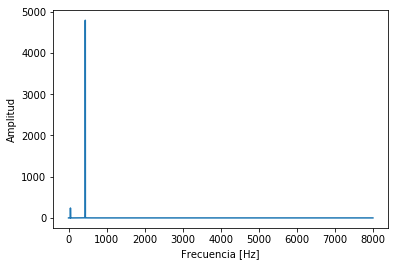

In [45]:
N = sr_sint*d  # número de muestras de la señal
f_nyq = sr_sint/2 # frecuencia de Nyquist

# vector para el eje de la frecuencia
xfrec = np.linspace(0, f_nyq, N//2) # atentos a este truco: a//b me devuelve un entero

# ahora grafico a partir del vector creado
plt.plot(xfrec, np.abs(espectro_sint[0:N//2]))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.show()

Ahora tenemos un gráfico correcto. Podemos asignar escalas logarítmicas para los ejes y agregar una grilla para visualizar mejor los datos. También normalizamos la amplitud (esto nos va a servir más adelante, cuando apliquemos la transformada inversa).

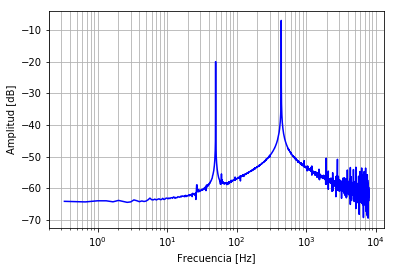

In [46]:
# semilogx es el equivalente a a plot, pero con eje de abscisas en escala logarítmica
# 2/N es el factor que multiplica a cada elemento para normalizar los valores de amplitud
# Luego se aplica 10log(Xnorm[k]) para expresar la amplitud en dB.

plt.semilogx(xfrec[1:N//2], 10*np.log10(2/N*np.abs(espectro_sint[1:N//2])), '-b')
plt.grid(which='both')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.show()

Ahora sí vemos con claridad nuestros dos picos de energía en 50 Hz y 440 Hz.

### Aplicando una ventana temporal

Algo que podríamos hacer es la implementación de ventanas temporales. ¿De qué estamos hablando? Para refrescar el concepto, o verlo por primera vez, pueden dirigirse [acá](). 

Para la FFT, tanto el dominio del tiempo como el dominio de frecuencia son topologías circulares, por lo que los dos extremos de la forma de onda de tiempo son interpretados como si estuvieran conectados entre sí. Cuando tenemos una señal periódica, esto resulta correcto, pero casi siempre estamos analizando un conjunto finito de datos que no es periódico dentro del intervalo en el que aplicamos la FFT. Por lo que tendremos un salto entre los extremos de la señal, que generará la aparición de componentes en distintas frecuencias a lo largo del espectro.

A fines prácticos, lo que queremos es aplicar una ventana temporal que reduzca los efectos de estos saltos en los 'bordes' de la señal. Por defecto, estamos aplicando una ventana rectangular, sin ninguna compensación de estos efectos. Esto es lo que hicimos anteriormente. Existen numerosas ventanas, algunas mejores que otras, pero en este caso no vamos a ahondar sobre eso. Vamos a aplicar una ventana de Hanning, y luego comparamos una implementación de esa FFT con la que hicimos antes. Antes, veamos una imagen de las ventanas y notemos cómo Hanning atenúa hacia los extremos de la señal.

![](../imagenes/ventanas.png)

In [47]:
from scipy.signal import windows as spwindow

w = spwindow.hann(N) # w es la ventana de hanning
espectro_sint_w = spfft(signal_sint*w) # la multiplico por la señal y luego hago la FFT

El submódulo que contiene las ventanas temporales es `scipy.signal.windows`. Guardamos la ventana en un array, especificando el número de muestras que tendrá. Éste tiene que coincidir con la cantidad de muestras de la señal. Luego 'ventaneamos' multiplicando ambas (elemento a elemento) y al resultado le aplicamos la FFT. 

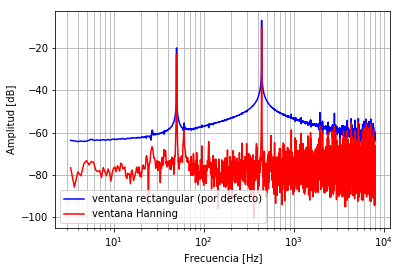

In [48]:
plt.semilogx(xfrec[10:N//2], 10*np.log10(2/N*np.abs(espectro_sint[10:N//2])), '-b')
plt.semilogx(xfrec[10:N//2], 10*np.log10(2/N*np.abs(espectro_sint_w[10:N//2])), '-r')

# ahora un poco de cosmética (como diría un profe...)
plt.grid(which='both')
plt.legend(['ventana rectangular (por defecto)', 'ventana Hanning'], loc=3)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.show()

Vemos un piso de ruido inferior para el caso de la ventana de Hanning. La ventana rectangular es siempre el peor caso de ventaneo que podemos aplicar, en cuanto a la aparición de ruido no deseado. Es importante notar  que también tenemos una disminución de la amplitud en los picos de energía del espectro al aplicar la ventana de Hanning.

Por otra parte, los efectos de borde se hacen menores al aumentar el número de muestras de la FFT. Por lo tanto, no será tan crucial la elección de la ventana en casos de gran cantidad de muestras. 

## Respuestas al impulso y convolucion

La operación de convolución es otra forma de filtrar señales, en este caso a partir de la respuesta del impulso a un sistema. Obviamente, Scipy nos da herramientas para implementarla. Recordemos un poco la ecuación que define a la convolución en tiempo discreto:

\begin{equation*}
    y[n] = x[n] * h[n]
\end{equation*}

Convolucionar dos señales equivale a desplazar una sobre la otra, multiplicandolas en cada paso del desplazamiento. Luego, la sumatoria de estos productos es la salida del sistema para la posición específica.

\begin{equation*}
    x[n] * h[n] = \sum^{\infty}_{k=-\infty} x[k] \cdot h[n-k]
\end{equation*}

Una forma visual de comprenderla:

![](../imagenes/convolucion.png)

Pero algo mucho más sencillo de hacer es la convolución en el dominio de la frecuencia. En este caso, basta con multiplicar las transformadas de las dos señales elemento a elemento, y luego aplicar la transformada inversa:

\begin{equation*}
    x[n] * y[n] = \mathcal{F}^{-1} (X[k] \cdot Y[k])
\end{equation*}


Tenemos la posibilidad de aplicar la convolución en cualquiera de los dos dominios. El paquete `signal` posee dos funciones: `convolve` y `fftconvolve`.
El segundo método aplica una FFT a ambas señales y las multiplica en el dominio de la frecuencia. En general, esto resulta un cálculo mucho más veloz, excepto en casos en los que se tienen señales de unas pocas muestras. Si pensamos en respuestas al impulso reales o sintetizadas, tenemos vectores lo suficientemente largos como para justificar la multiplicación en frecuencia.

De todas formas, podremos utilizar `convolve` para operar por medio del método más conveniente, ya que es capaz de llamar a la función `fftconvolve` si la utilización de la FFT resuelve el cálculo en menor tiempo. 

Para implementarla, los argumentos de entrada son las dos señales a convolucionar, $x[n]$ y $h[n]$, que representan la entrada del sistema y su respuesta al impulso. Veamos un ejemplo.

In [49]:
x_ent = np.ones(5, dtype=np.int8)
h_sist = np.arange(3, dtype=np.int8)

x_ent, h_sist

(array([1, 1, 1, 1, 1], dtype=int8), array([0, 1, 2], dtype=int8))

In [50]:
import time

In [51]:
# intercambiemos los modos para ver los resultados
metodo = ['auto', 'direct', 'fft']

inicio = time.time()

y_out = spsignal.convolve(x_ent, h_sist) # method = 'auto' por defecto 

fin = time.time()
delay_sum = fin - inicio

print(np.round(delay_sum, 4), 'ms')

NameError: name 'spsignal' is not defined

In [ ]:
plt.stem(y_out)

Ahora implementemos lo mismo a partir de una respuesta al impulso real de un recinto, lo que se conoce como **auralización**. A partir de este proceso, podremos emular la escucha dentro del recinto para la señal a convolucionar con su respuesta al impulso. Por convención, se denota a la misma como $h[n]$. Luego, $y[n] = x[n] * h[n]$ es el resultado de convolucionarla con una señal $x[n]$, que en general es una grabación anecoica.

In [ ]:
signal_ir, sr_ir = sf.read(ruta + 'ir_tunel.wav', dtype=np.float32)

Primero, obtenemos el array correspondiente a nuestra respuesta al impulso. Ahora tratemos de convolucionarlo con la grabación del clarinete. Previamente, tendremos que verificar que ambas señales tengan la misma frecuencia de muestreo. En caso contrario, los resultados de la convolución no tendrán que ver con la respuesta real dentro del recinto.

In [ ]:
sr_ir, sr

En este caso, ambas son iguales por lo que no deberíamos tener problema al convolucionar.

In [ ]:
signal_clar_conv = spsignal.convolve(signal_clar, signal_ir)

sf.write(ruta + 'clarinete_aura.wav', signal_clar_conv, sr)

Para convolucionar la respuesta del recinto con la señal sintetizada que creamos, tenemos una diferencia en los valores de la frecuencia de muestreo. Recordemos cuál era su valor.

In [ ]:
sr_sint, sr_ir

Si aplicamos la convolución directamente, estamos operando con dos señales que representan un mismo intervalo de tiempo con diferente cantidad de muestras. Si luego de convolucionar generamos un archivo de audio muestreado a 16 Khz, el tiempo de reverberación será más largo y tendrá un cambio en su contenido en frecuencia. El efecto inverso se percibiría si la respuesta al impulso tiene una frecuencia de muestreo menor que la señal $x[n]$.

Para poder resolver este problema podemos remuestrear una de las dos señales. En este caso, podemos submuestrear la respuesta al impulso para que sea igual a la de la señal sintetizada. Para ello, usaremos la función `decimate`. La misma aplica el método de decimación para disminuir la frecuencia de muestreo de una señal por unn factor $Q$.  

In [ ]:
q = np.int8(sr_ir / sr_sint) # q = 96000 / 16000 = 6

signal_ir_ds = spsignal.decimate(signal_ir, q)

In [ ]:
signal_sint_conv = spsignal.convolve(signal_sint, signal_ir_ds)
sf.write(ruta + 'audio_sintetizado_aura.wav', signal_sint_conv, sr_sint)

Si quisiéramos aplicar upsampling, o remuestrear por factores $Q$ no enteros, podemos implementar la función `resample_poly` indicando la señal de entrada, y los factores de sobremuestreo y submuestreo (recordemos que para Q no entero, primero se aplica sobremuestreo por un factor $n$ y luego submuestreo por un factor $m$).

## Referencias

* J. Hunter et. al. Matplotlib - Release 2.2.2,  Extraído de [Matplotlib.org](https://matplotlib.org/)
* A. Devert. Matplotlib Plotting Cookbook, Packt Publishing, 2014.
* Scipy Reference Guide, www.scipy.org
* Audio and Digital Signal Processing(DSP) in Python, www.pythonforengineers.com 
* J. Glover et. al, Python For Audio Signal Processing. he Sound and Digital Music Research Group (2011). 
* Comprender FFTs y Funciones Ventana, www.ni.com (2017).
* Oppenheim A., Willsky A. Signals and Systems. 2° edición, Prentice Hall (1997).

## Licencia

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Este documento se destribuye con una <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">licencia Atribución CompartirIgual 4.0 Internacional de Creative Commons</a>.

© 2018. Infiniem Lab DSP. **infiniemlab.dsp@gmail.com**. Introducción informal a Python3 (CC BY-SA 4.0)